Mounting Google Drive Storage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Changing to Working Directory

In [ ]:
import os
os.chdir('/content/drive/Shareddrives/SP\'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107')
print('Current Directory :', os.getcwd(), '\nDirectory Contents:\n', os.listdir())

Current Directory : /content/drive/Shareddrives/SP'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107 
Directory Contents:
 ['ab.zip', 'af.zip', 'am.zip', 'ar.zip', 'as.zip', 'az.zip', 'ba.zip', 'be.zip', 'bg.zip', 'bn.zip', 'bo.zip', 'br.zip', 'bs.zip', 'ca.zip', 'ceb.zip', 'cs.zip', 'cy.zip', 'da.zip', 'de.zip', 'el.zip', 'en.zip', 'eo.zip', 'es.zip', 'et.zip', 'eu.zip', 'fa.zip', 'fi.zip', 'fo.zip', 'fr.zip', 'gl.zip', 'gn.zip', 'gu.zip', 'gv.zip', 'ha.zip', 'haw.zip', 'hi.zip', 'hr.zip', 'ht.zip', 'hu.zip', 'hy.zip', 'ia.zip', 'id.zip', 'is.zip', 'it.zip', 'iw.zip', 'ja.zip', 'jw.zip', 'ka.zip', 'kk.zip', 'km.zip', 'kn.zip', 'ko.zip', 'la.zip', 'lb.zip', 'ln.zip', 'lo.zip', 'lt.zip', 'lv.zip', 'mg.zip', 'mi.zip', 'mk.zip', 'ml.zip', 'mn.zip', 'mr.zip', 'ms.zip', 'mt.zip', 'my.zip', 'ne.zip', 'nl.zip', 'nn.zip', 'no.zip', 'oc.zip', 'pa.zip', 'pl.zip', 'ps.zip', 'pt.zip', 'ro.zip', 'ru.zip', 'sa.zip', 'sco.zip', 'sd.zip', 'si.zip', 'sk.zip', 'sl.zip', 'sn.zip', 'so.zip', 'sq.z

In [ ]:
#Extracting Language Archives
#!unzip 'en.zip' -d 'Extracted Datasets' #English
#!unzip 'hi.zip' -d 'Extracted Datasets' #Hindi
#!unzip 'ta.zip' -d 'Extracted Datasets' #Tamil
#!unzip 'bn.zip' -d 'Extracted Datasets' #Bengali
#!unzip 'gu.zip' -d 'Extracted Datasets' #Gujarati
#!unzip 'ml.zip' -d 'Extracted Datasets' #Malayalam
#!unzip 'ne.zip' -d 'Extracted Datasets' #Nepali
#!unzip 'kn.zip' -d 'Extracted Datasets' #Kannada

Required Imports

In [ ]:
import librosa
import numpy as np
import time
import matplotlib.pyplot as plt
from librosa.display import specshow

Parameters

In [ ]:
samplingRate = 22050

In [ ]:
os.chdir('/content/drive/Shareddrives/SP\'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107/Extracted Datasets')
languages = sorted(os.listdir())
print('Current Directory :', os.getcwd(), '\nDirectory Contents:', languages)
nLanguages = len(languages)

Current Directory : /content/drive/Shareddrives/SP'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107/Extracted Datasets 
Directory Contents: ['bn', 'en', 'gu', 'hi', 'kn', 'ml', 'ne', 'ta']


Feature Extraction

In [ ]:
maxFiles = 1000

for lanIndex in range(nLanguages):
  os.chdir('/content/drive/Shareddrives/SP\'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107/Extracted Datasets')
  os.chdir(languages[lanIndex])

  audioFilenames = os.listdir()
  print('Current Directory :', os.getcwd(), '\nNumber of Files:', len(audioFilenames))

  startTime = time.time()
  audioFeatures = {}
  
  for fileIndex in range(maxFiles):
    audioFile = audioFilenames[fileIndex]
    audioSignal = librosa.load(audioFile)[0]
    mfcc = librosa.feature.mfcc(audioSignal, samplingRate, n_mfcc = 13)
    delta = librosa.feature.delta(mfcc, order = 1)
    deltaDelta = librosa.feature.delta(mfcc, order = 2)
    audioFeatures[fileIndex] = np.concatenate((mfcc, delta, deltaDelta))

  os.chdir('/content/drive/Shareddrives/SP\'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107/Feature Files')
  np.save('{0}AudioFeatures.npy'.format(languages[lanIndex]), audioFeatures, allow_pickle = True)
  totalTime = time.time() - startTime
  print('Average Time Taken per File = ', totalTime/maxFiles, 's\nTotal Time Taken = ', totalTime, 's')

Current Directory : /content/drive/Shareddrives/SP'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107/Extracted Datasets/bn 
Number of Files: 15900
Average Time Taken per File =  0.44675180125236513 s
Total Time Taken =  446.7518012523651 s
Current Directory : /content/drive/Shareddrives/SP'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107/Extracted Datasets/en 
Number of Files: 15860
Average Time Taken per File =  0.5893919579982757 s
Total Time Taken =  589.3919579982758 s
Current Directory : /content/drive/Shareddrives/SP'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107/Extracted Datasets/gu 
Number of Files: 7012
Average Time Taken per File =  0.5100041427612305 s
Total Time Taken =  510.00414276123047 s
Current Directory : /content/drive/Shareddrives/SP'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107/Extracted Datasets/hi 
Number of Files: 29968
Average Time Taken per File =  0.5555596525669098 s
Total Time Taken =  555.5596525669098 s
Current Dir

Feature Padding

In [ ]:
os.chdir('/content/drive/Shareddrives/SP\'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107/Feature Files')
maxDim = np.NINF

for lanIndex in range(nLanguages):
  audioFeatures = np.load('{0}AudioFeatures.npy'.format(languages[lanIndex]), allow_pickle = True)[()]
  for fileIndex in range(len(audioFeatures)):
    nFrames = audioFeatures[fileIndex].shape[1]
    if maxDim < audioFeatures[fileIndex].shape[1]:
      maxDim = nFrames

padInfoMatrix = []
outputLabelMatrix = []
featureMatrix = []

for lanIndex in range(nLanguages):
  lanPadInfoList = []
  audioFeatures = np.load('{0}AudioFeatures.npy'.format(languages[lanIndex]), allow_pickle = True)[()]
  outputLabelList = []
  featureList = []

  for fileIndex in range(len(audioFeatures)):
    audioFile = audioFeatures[fileIndex]
    lanPadInfoList.append(maxDim - audioFile.shape[1])
    audioFeatures[fileIndex] = np.pad(audioFile, ((0, 0), (0, maxDim - audioFile.shape[1])), 'constant', constant_values = 0)
    featureList.append(audioFeatures[fileIndex])

    #sampleLabel = audioFile.shape[1]*[lanIndex + 1]
    #padRegionLabel = (maxDim - audioFile.shape[1])*[0]
    #sampleLabel.extend(padRegionLabel)
    #outputLabelList.append(np.array(sampleLabel))
    outputLabelList.append(lanIndex + 1)

  padInfoMatrix.append(np.array(lanPadInfoList))
  outputLabelMatrix.append(np.array(outputLabelList))
  featureMatrix.append(np.array(featureList))

padInfoMatrix = np.array(padInfoMatrix)
outputLabelMatrix = np.array(outputLabelMatrix)
featureMatrix = np.array(featureMatrix)

np.save('outputLabels.npy', outputLabelMatrix, allow_pickle = True)
np.save('padInformationMatrix.npy', padInfoMatrix, allow_pickle = True)
np.save('featureMatrix.npy', featureMatrix, allow_pickle = True)

print(outputLabelMatrix.shape, featureMatrix.shape, padInfoMatrix.shape)

(8, 1000) (8, 1000, 39, 862) (8, 1000)


Sample Melspectrogram

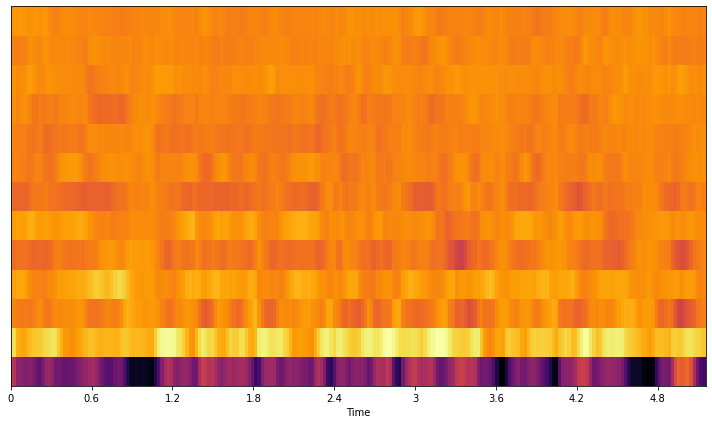

In [ ]:
os.chdir('/content/drive/Shareddrives/SP\'21 : Course Project : SLR/Notebooks/Datasets/VoxLingua107/Extracted Datasets/en')
audioFile = librosa.load(os.listdir()[0])[0]
mfcc = librosa.feature.mfcc(audioFile, samplingRate, n_mfcc = 13)
delta = librosa.feature.delta(mfcc, order = 1)
deltaDelta = librosa.feature.delta(mfcc, order = 2)
plt.figure(figsize = (10, 6))
specshow(mfcc, cmap = 'inferno', x_axis = 'time')
plt.tight_layout()

In [ ]:
outputLabelMatrix[0][999]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,